Imports

In [11]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import pickle
from keras.utils import np_utils
from matplotlib import pyplot as plt
import pandas as pd


from sklearn.metrics import classification_report, confusion_matrix


In [12]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Dataset

In [13]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Data Pre preprocessing

In [15]:
X_train = X_train/255
X_test = X_test/255
y_train  = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Data Augmentation

In [16]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


Model

In [17]:
model_combined = Sequential()

model_combined.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_combined.add(BatchNormalization())
model_combined.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_combined.add(BatchNormalization())
model_combined.add(MaxPooling2D(pool_size=(2,2)))
model_combined.add(Dropout(0.2))

model_combined.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_combined.add(BatchNormalization())
model_combined.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_combined.add(BatchNormalization())
model_combined.add(MaxPooling2D(pool_size=(2,2)))
model_combined.add(Dropout(0.25))

model_combined.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_combined.add(BatchNormalization())
model_combined.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_combined.add(BatchNormalization())
model_combined.add(MaxPooling2D(pool_size=(2,2)))
model_combined.add(Dropout(0.35))

model_combined.add(Flatten())

model_combined.add(Dense(256, activation='relu'))
model_combined.add(BatchNormalization())
model_combined.add(Dropout(0.5))
model_combined.add(Dense(10, activation='softmax'))

model_combined.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_combined.compile(loss='categorical_crossentropy', ptimizer=Adam(lr=1.0e-4),metrics = ['accuracy']) 


In [18]:
model_combined.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

Model Training

In [19]:
checkpoint = ModelCheckpoint("/content/gdrive/My Drive/Colab_Models/model_.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

In [20]:
# model_combined.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 15)

history_3 = model_combined.fit(X_train, y_train, epochs = 350, verbose = 1, validation_data = (X_test, y_test), callbacks = [checkpoint])

Epoch 1/350
1561/1563 [============================>.] - ETA: 0s - loss: 1.6100 - accuracy: 0.4489
Epoch 1: loss improved from inf to 1.60945, saving model to /content/gdrive/My Drive/Colab_Models/model_.h5
1563/1563 [==============================] - 33s 20ms/step - loss: 1.6095 - accuracy: 0.4490 - val_loss: 1.3885 - val_accuracy: 0.5476
Epoch 2/350
1561/1563 [============================>.] - ETA: 0s - loss: 0.9591 - accuracy: 0.6637
Epoch 2: loss improved from 1.60945 to 0.95908, saving model to /content/gdrive/My Drive/Colab_Models/model_.h5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9591 - accuracy: 0.6637 - val_loss: 1.2703 - val_accuracy: 0.5758
Epoch 3/350
1561/1563 [============================>.] - ETA: 0s - loss: 0.7640 - accuracy: 0.7382
Epoch 3: loss improved from 0.95908 to 0.76406, saving model to /content/gdrive/My Drive/Colab_Models/model_.h5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7641 - accuracy: 0.7382 - val_lo

Training stats

In [21]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [22]:
model_combined.save('/content/gdrive/My Drive/Colab_Models/model_.h5')

In [23]:
metrics = pd.DataFrame(history_3.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.609450,0.44900,1.388491,0.5476
1,0.959075,0.66366,1.270343,0.5758
2,0.764058,0.73824,0.671509,0.7669
3,0.647902,0.78116,0.689315,0.7616
4,0.553692,0.81380,0.589181,0.8014
...,...,...,...,...
345,0.013400,0.99574,0.694029,0.8878
346,0.011767,0.99600,0.756399,0.8790
347,0.011580,0.99610,0.694381,0.8839
348,0.010353,0.99644,0.696579,0.8841


Evaluation

In [24]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

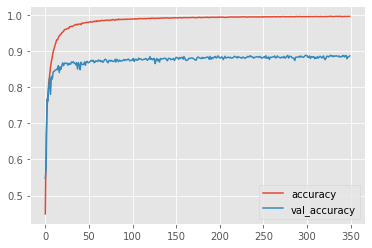

In [25]:
metrics[["accuracy", "val_accuracy"]].plot()

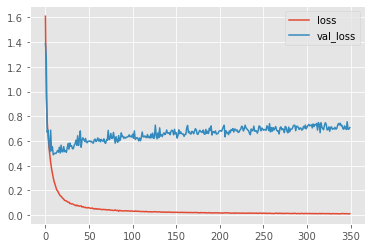

In [26]:
metrics[["loss", "val_loss"]].plot()

In [27]:
model_combined.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 2s 7ms/step - loss: 0.7089 - accuracy: 0.8869


[0.7089348435401917, 0.886900007724762]

In [28]:
predict_x=model_combined.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 5ms/step


In [29]:
# print(classification_report(y_test, classes_x))

In [30]:
# confusion_matrix(y_test, classes_x)

In [32]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test, classes_x), annot = True)

ValueError: ignored

<Figure size 720x432 with 0 Axes>

In [ ]:
# scores = augmented_model.evaluate(X_test, Y_test_en, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))


Individual test

In [ ]:
my_image = X_test[0]
print(my_image)
plt.imshow(my_image)
y_test[0]
model.predict(my_image.reshape(1, 32, 32, 3))